In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
train_data=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_data=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


* Average Sale Price is at $180,921
* Ouliers are possibly present

Now we find the highest and lowest correlations to SalePrice(because that's what we're here to predict)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

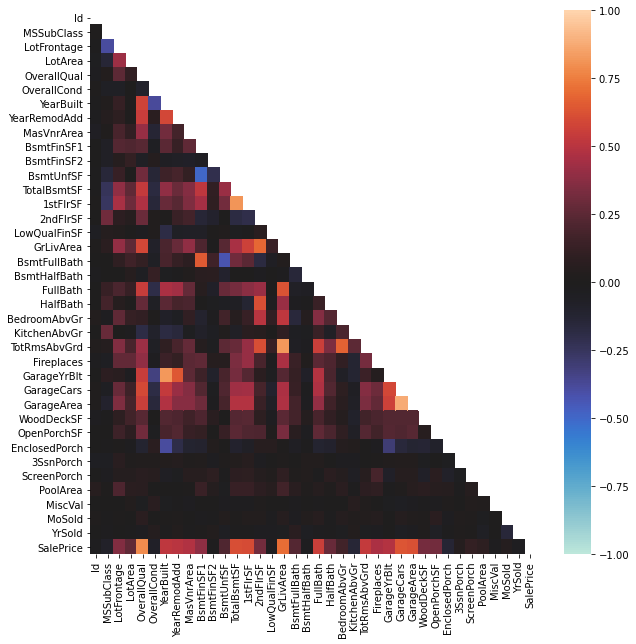

In [9]:
corr = train_data.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)#
print(corr.SalePrice)

ax = plt.subplots(ncols=1, figsize=(10,10))
corr_matrix = train_data.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, vmin = -1, vmax = 1, center = 0);
plt.show()

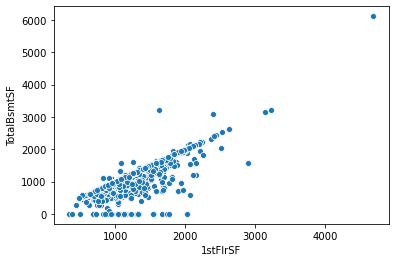

In [10]:
sns.scatterplot(x= train_data['1stFlrSF'], y=train_data['TotalBsmtSF'])

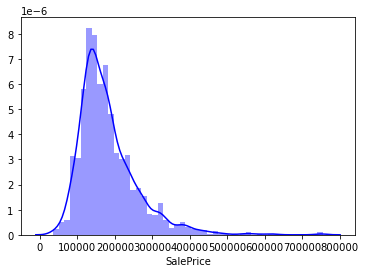

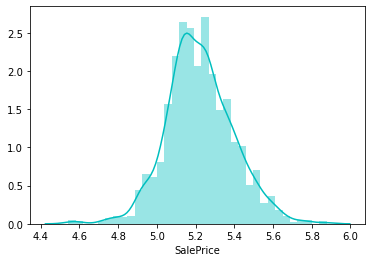

In [11]:
sns.distplot(train_data['SalePrice'], color="b");
plt.show()

Log_Y = train_data['SalePrice']
sns.distplot(np.log10(Log_Y), color="c");
plt.show()

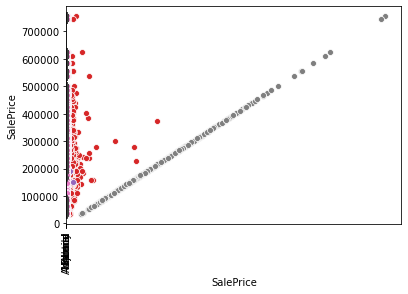

In [12]:
for i in train_data.select_dtypes(include='object').columns:
    sns.boxplot(x=train_data[i], y =train_data['SalePrice'])
    plt.xticks(rotation=90)
    #plt.show()
    
for i in train_data.select_dtypes(exclude='object').columns:
    sns.scatterplot(x=train_data[i], y=train_data['SalePrice'])
    #plt.show()

Elimating the outliers

In [13]:
print(train_data[(train_data['LotFrontage']>300)].index)
print(train_data[(train_data['LotArea']>200000)].index)
print(train_data[(train_data['BsmtFinSF1']>5000)].index)
print(train_data[(train_data['TotalBsmtSF']>5000)].index)
print(train_data[(train_data['1stFlrSF']>4000)].index)
print(train_data[(train_data['GrLivArea']>4500)].index)
print(train_data[(train_data['EnclosedPorch']>500)].index)
print(train_data[(train_data['MiscVal']>8000)].index)

Int64Index([934, 1298], dtype='int64')
Int64Index([313], dtype='int64')
Int64Index([1298], dtype='int64')
Int64Index([1298], dtype='int64')
Int64Index([1298], dtype='int64')
Int64Index([523, 1298], dtype='int64')
Int64Index([197], dtype='int64')
Int64Index([346, 1230], dtype='int64')


In [14]:
train_data = train_data.drop([523, 1298, 934, 313, 346, 197])

In [15]:
dataset=pd.concat([train_data,test_data],axis=0)

In [16]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [17]:
dataset.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [18]:
dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)
dataset['YrSold'] = dataset['YrSold'].astype(str)
dataset['MoSold'] = dataset['MoSold'].astype(str)
dataset['YearRemodAdd'] = dataset['YearRemodAdd'].astype(str)

In [19]:
dataset.drop(["Id"],axis=1,inplace=True)

## Missing Values

In [20]:
quant=[i for i in dataset.columns if dataset.dtypes[i]!='object']
qual=[i for i in dataset.columns if dataset.dtypes[i]=='object']

for i in quant:
    dataset.fillna(dataset.median(),inplace=True)

category=['PoolArea', 'Fence', 'MiscFeature', 'Alley','FireplaceQu']
for i in category:
    dataset[i] = dataset[i].fillna('None')
    
for i in quant:
    dataset[i].fillna(dataset[i].mode()[0], inplace = True)
    
dataset.isnull().sum().sum()

3980

In [21]:
dataset.skew(axis=0,skipna=True)

MSSubClass        1.375035
LotFrontage       0.723704
LotArea          10.421630
OverallQual       0.191446
OverallCond       0.570040
YearBuilt        -0.601032
YearRemodAdd     -0.449792
MasVnrArea        2.620922
BsmtFinSF1        0.983503
BsmtFinSF2        4.162174
BsmtUnfSF         0.919039
TotalBsmtSF       0.675923
1stFlrSF          1.260588
2ndFlrSF          0.860599
LowQualFinSF     12.330656
GrLivArea         1.068619
BsmtFullBath      0.620675
BsmtHalfBath      3.943319
FullBath          0.166972
HalfBath          0.694846
BedroomAbvGr      0.327864
KitchenAbvGr      4.299354
TotRmsAbvGrd      0.752105
Fireplaces        0.726676
GarageYrBlt      -0.398475
GarageCars       -0.218185
GarageArea        0.219133
WoodDeckSF        1.844066
OpenPorchSF       2.528887
EnclosedPorch     3.955567
3SsnPorch        11.369962
ScreenPorch       3.943946
PoolArea         18.647496
MiscVal          23.351597
MoSold            0.196385
YrSold            0.131944
SalePrice         3.033902
d

In [22]:
dataset["LotArea"] = np.log1p(dataset["LotArea"])
dataset["LotFrontage"] = np.log1p(dataset["LotFrontage"])
dataset["GrLivArea"] = np.log1p(dataset["GrLivArea"])

In [23]:
dataset['TotalSF']=dataset['TotalBsmtSF']+ dataset['1stFlrSF']+ dataset['2ndFlrSF']
#Total number of baths
dataset['TotalBath'] = (dataset['FullBath'] + (0.5 * dataset['HalfBath']) + dataset['BsmtFullBath'] + (0.5 * dataset['BsmtHalfBath']))
#Total porch area
dataset['TotalPorchSF'] = dataset['OpenPorchSF'] + dataset['3SsnPorch'] + dataset['EnclosedPorch'] + dataset['ScreenPorch']+ dataset['WoodDeckSF']

In [24]:
dataset = pd.get_dummies(data=dataset)

In [25]:
train=dataset[:len(train_data)]
test=dataset[len(train_data):]

In [26]:
test.drop(["SalePrice"],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
y = np.log1p(train["SalePrice"]).values
x = train.drop(["SalePrice"], axis=1)

0.9405707829756882
0.09734901039067015


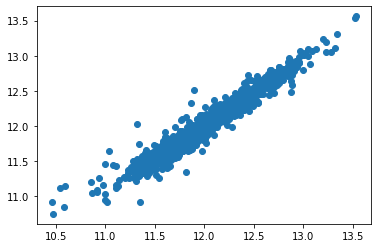

In [28]:
Lasso_model = LassoCV(alphas = [1, 0.1, 0.01, 0.001, 0.0005], selection='random', max_iter=15000).fit(x, y)
y_pred = Lasso_model.predict(x)

print(r2_score(y, y_pred))
print(np.sqrt(mean_squared_error(y,y_pred)))

Lasso_Test = Lasso_model.predict(test)
#coef = pd.Series(Lasso_model.coef_, index = x.columns)

df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
df
plt.scatter(y,y_pred)
plt.show()

0.9550761746015562
0.08463887887927189


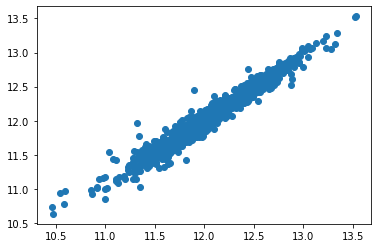

In [29]:
Ridge_model = Ridge(alpha=0.05)
Ridge_model.fit(x, y)
y_pred = Ridge_model.predict(x)

print(r2_score(y, y_pred))
print(np.sqrt(mean_squared_error(y,y_pred)))

Ridge_RMSE = np.sqrt(mean_squared_error(y,y_pred))
Ridge_Test = Ridge_model.predict(test)

df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
df
plt.scatter(y,y_pred)
plt.show()

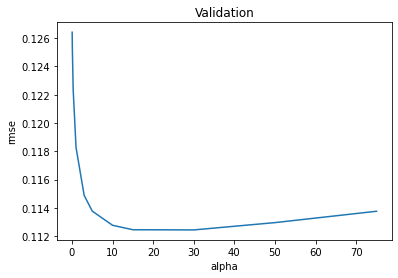

In [30]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
def rmse_cv(Ridge_model):
    rmse= np.sqrt(-cross_val_score(Ridge_model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

0.9551315892944174
0.08458666065530639


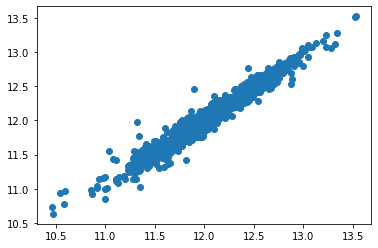

In [31]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

print(r2_score(y, y_pred))
print(np.sqrt(mean_squared_error(y,y_pred)))

Linear_RMSE = np.sqrt(mean_squared_error(y,y_pred))

"""Shows plot of predicted and actuals"""
df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
df
plt.scatter(y,y_pred)
plt.show()

In [32]:
df = pd.DataFrame({'Predicted': Lasso_Test})
df = np.exp(df)
Sub = pd.DataFrame()
Sub['Id'] = test_data['Id']
Sub['SalePrice'] = df
Sub.to_csv('submission.csv',index=False)
print("Saved Successfully")

Saved Successfully
